# Problem Statement

This hackathon will try to address the challenges faced by taxi operators in quoting the right fare to customers **before starting the trip**. However, the details are shared with taxi drivers or operators related to the trip, they find it difficult to quote the right fare because of uncertainties and calculation complexities. The same issue is faced by passengers as well because of inaccurate or irrelevant fares quoted. To find a solution for this, this hackathon provides a historical dataset to participants that includes records of taxi trip details and fares of those trips. Using this dataset, the participants need to **build machine learning models for predicting the trip fare** based on the given other useful features of the trip.

Overall, it involves using a dataset, finding the best set of features from the dataset, building a machine learning model to predict trip fare based on other trip features and evaluating the predictions using mean squared error and finally submitting the predictions in the given template.

The Competition can be accessed using the link:
https://machinehack.com/hackathons/iiit_nr_taxi_trip_fare_prediction_challenge/overview

**Data description:**

**Trip_distance:** The elapsed trip distance in miles reported by the taximeter.</br>
**Rate_code:** The final rate code is in effect at the end of the trip. 1= Standard rate,2=JFK,3=Newark, 4=Nassau or Westchester, 5=Negotiated fare,6=Group ride</br>
**Storeandfwd_flag:** This flag indicates whether the trip record was held in vehicle memory before sending it to the vendor and determines if the trip was stored in the server and forwarded to the vendor. Y= store and forward trip N= not a store and forward trip</br>
**Payment_type:** A numeric code signifying how the passenger paid for the trip. 1= Credit card,2= Cash, 3= No charge, 4= Dispute, 5= Unknown, 6= Voided trip</br>
**Fare_amount:** The time-and-distance fare calculated by the meter</br>
**Extra:** Miscellaneous extras and surcharges.</br>
**Mta_tax:** USD0.50 MTA tax that is automatically triggered based on the metered rate in use.</br>
**Tip_amount:** Tip amount credited to the driver for credit card transactions.</br>
**Tolls_amount:** Total amount of all tolls paid in the trip.</br>
**Imp_surcharge:** USD0.30 extra charges added automatically to all rides</br>
**Total_amount:** The total amount charged to passengers. Does not include cash tips</br>
**Pickuplocationid:** TLC Taxi Zone in which the taximeter was engaged</br>
**Dropofflocationid**: TLC Taxi Zone in which the taximeter was disengaged</br>
**Year:** The year in which the taxi trip was taken.</br>
**Month:** The month on which the taxi trip was taken.</br>
**Day:** The day on which the taxi trip was taken.</br>
**Day_of_week:** The day of the week on which the taxi trip was taken</br>
**Hour_of_day:** Used to determine the hour of the day in 24 hours format</br>
**Trip_duration:** The total duration of the trip in seconds</br>
**calculated_total_amount:** The total amount the customer has to pay for the taxi.</br>

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [137]:
pd.set_option('display.max_columns',None)

In [138]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
submission=pd.read_csv('submission.csv')

In [139]:
train.shape,test.shape,submission.shape

((35000, 20), (15000, 19), (15000, 1))

In [140]:
taxi=pd.concat([train,test],ignore_index=True)
taxi.shape

(50000, 20)

In [141]:
taxi.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80


# Univariate Analysis

In [142]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trip_distance            50000 non-null  float64
 1   rate_code                50000 non-null  int64  
 2   store_and_fwd_flag       50000 non-null  object 
 3   payment_type             50000 non-null  int64  
 4   fare_amount              50000 non-null  float64
 5   extra                    50000 non-null  float64
 6   mta_tax                  50000 non-null  float64
 7   tip_amount               50000 non-null  float64
 8   tolls_amount             50000 non-null  float64
 9   imp_surcharge            50000 non-null  float64
 10  total_amount             50000 non-null  float64
 11  pickup_location_id       50000 non-null  int64  
 12  dropoff_location_id      50000 non-null  int64  
 13  year                     50000 non-null  int64  
 14  month                 

In [143]:
numcols=taxi.select_dtypes(include=np.number).columns
numcols

Index(['trip_distance', 'rate_code', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'imp_surcharge',
       'total_amount', 'pickup_location_id', 'dropoff_location_id', 'year',
       'month', 'day', 'day_of_week', 'hour_of_day', 'trip_duration',
       'calculated_total_amount'],
      dtype='object')

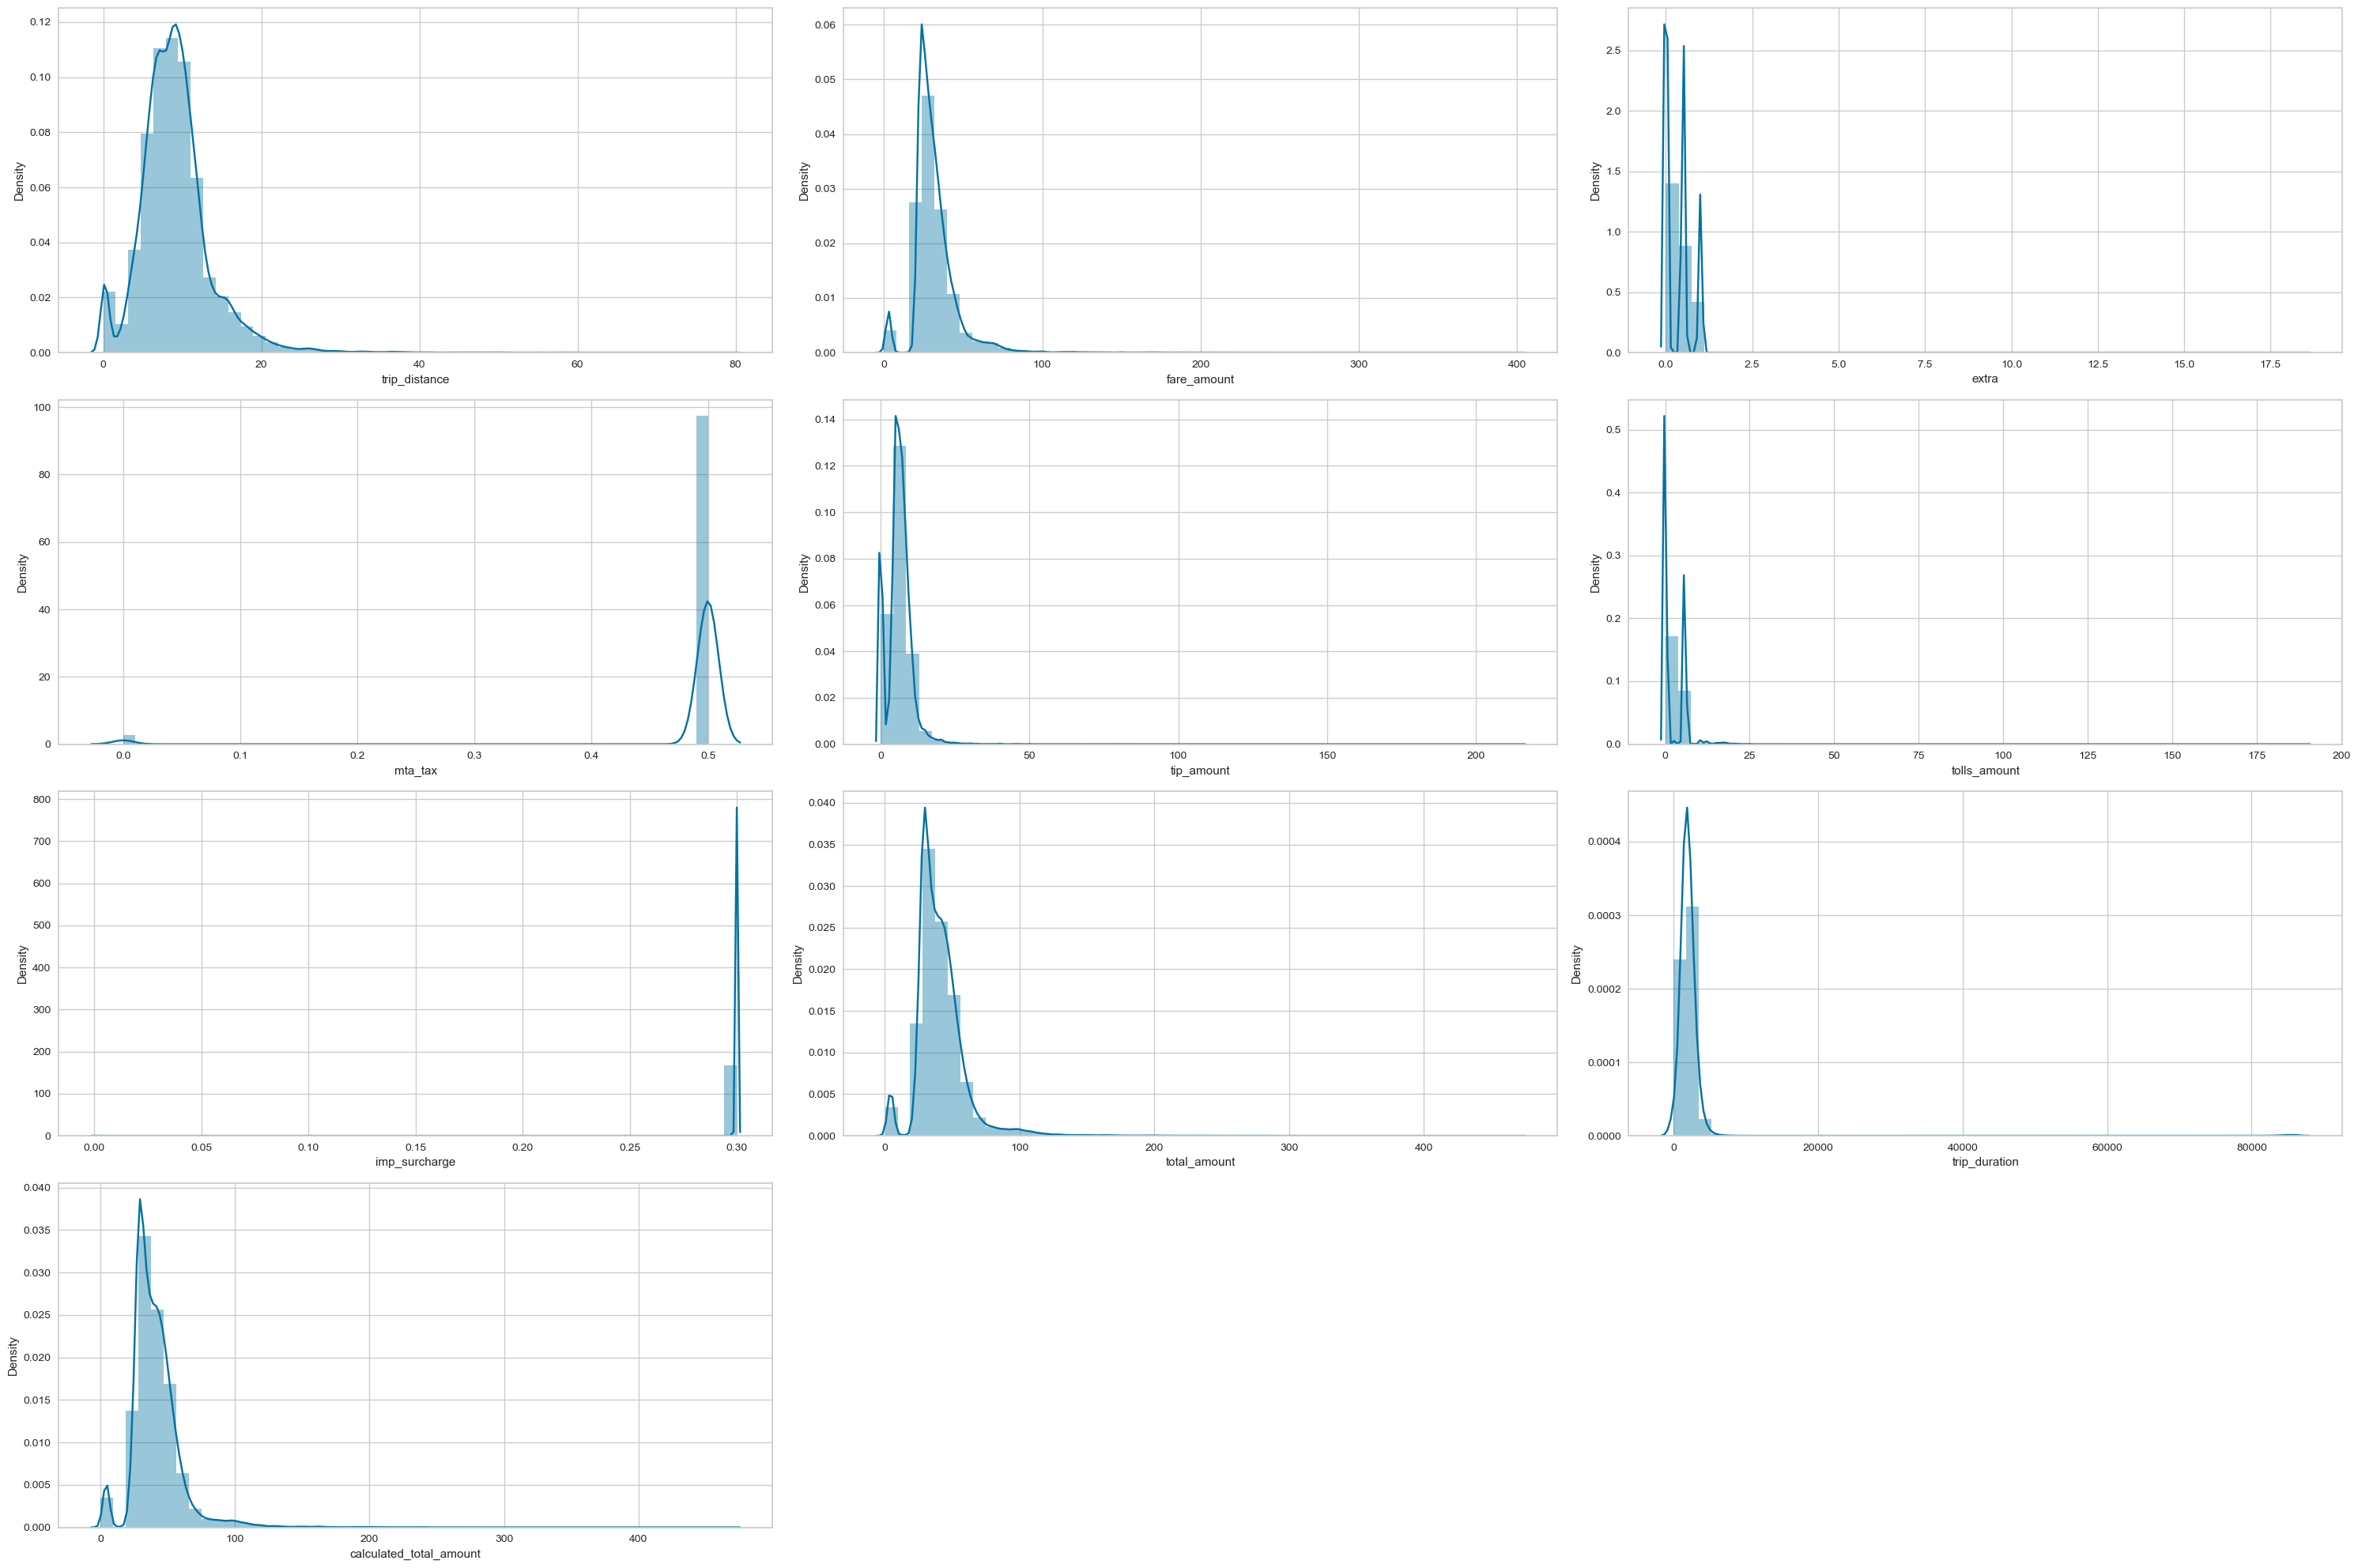

In [144]:
num_cols=['trip_distance','fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'imp_surcharge',
       'total_amount', 'trip_duration',
       'calculated_total_amount']

plt.figure(figsize=(30,20),)

nrows= 4
ncols=3
t=1

for i in num_cols:
    plt.subplot(nrows,ncols,t)
    sns.distplot(taxi[i])
    t+=1

plt.tight_layout()
plt.show()

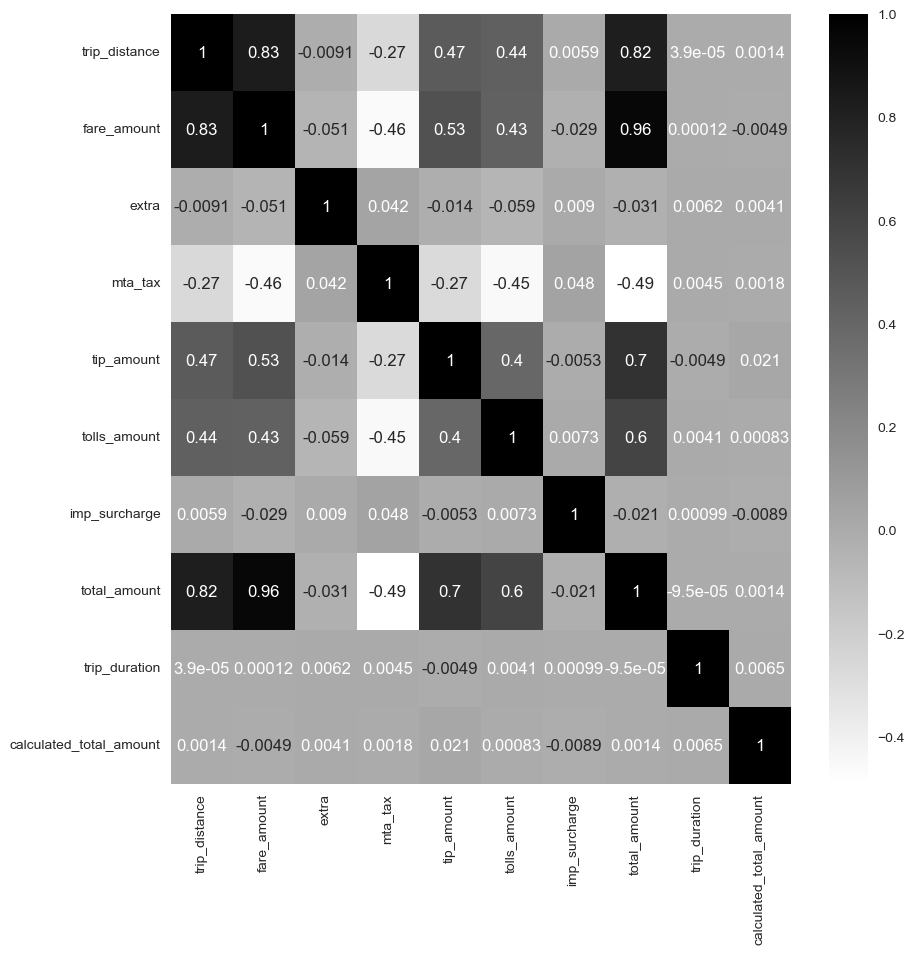

In [145]:
# Check the correlation between the Numerical vars

plt.figure(figsize=(10,10))

sns.heatmap(taxi.loc[:,num_cols].corr(),annot=True,cmap='gray_r')

plt.show()

#

In [146]:
#Lets look into the categorical variables

cat_cols=['rate_code', 'store_and_fwd_flag', 'payment_type','pickup_location_id',
       'dropoff_location_id', 'month', 'day', 'day_of_week','hour_of_day']
cat_cols

['rate_code',
 'store_and_fwd_flag',
 'payment_type',
 'pickup_location_id',
 'dropoff_location_id',
 'month',
 'day',
 'day_of_week',
 'hour_of_day']

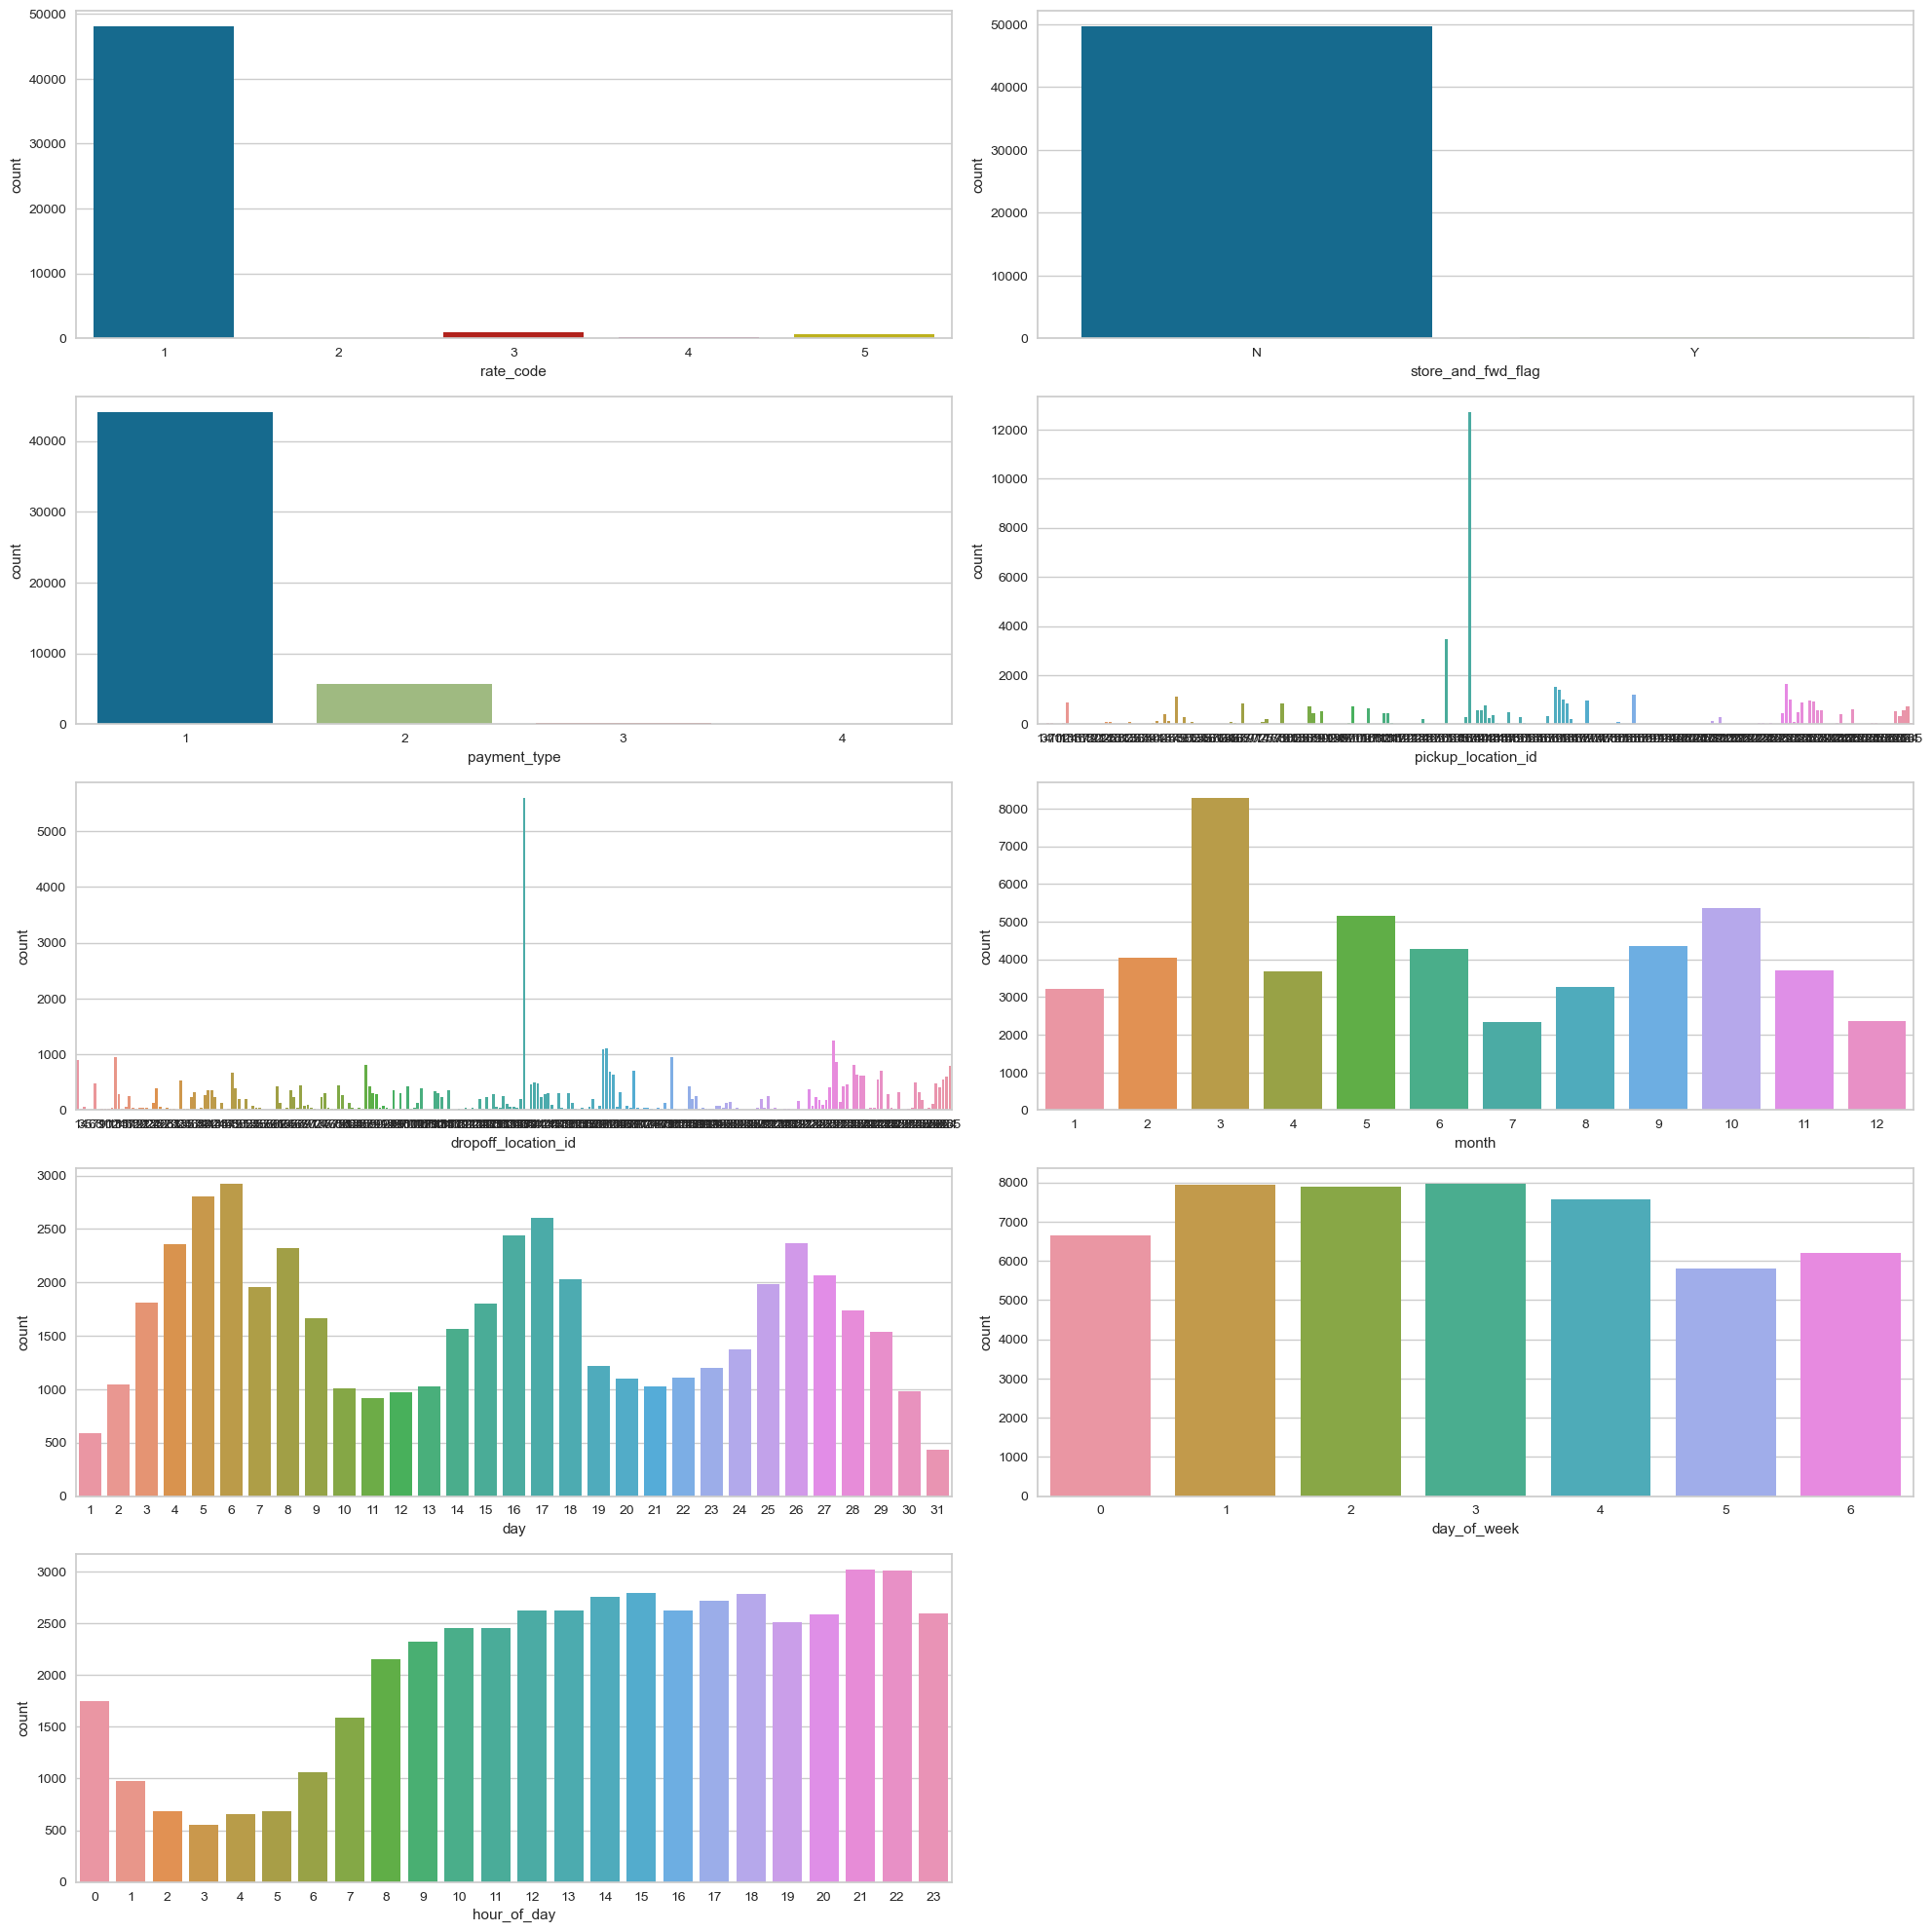

In [147]:
nrows=5
ncols=2
t=1

plt.figure(figsize=(20,20))

for i in cat_cols:
    plt.subplot(nrows,ncols,t)
    sns.countplot(taxi[i])
    t+=1
    
plt.tight_layout()
plt.show()

In [148]:
taxi.drop('year',axis=1,inplace=True)

**Submitting the base model**

In [149]:
submission['calculated_total_amount']=train.calculated_total_amount.mean()

In [150]:
submission.to_csv('basemodel.csv',index=False)

# Bivariate Analysis

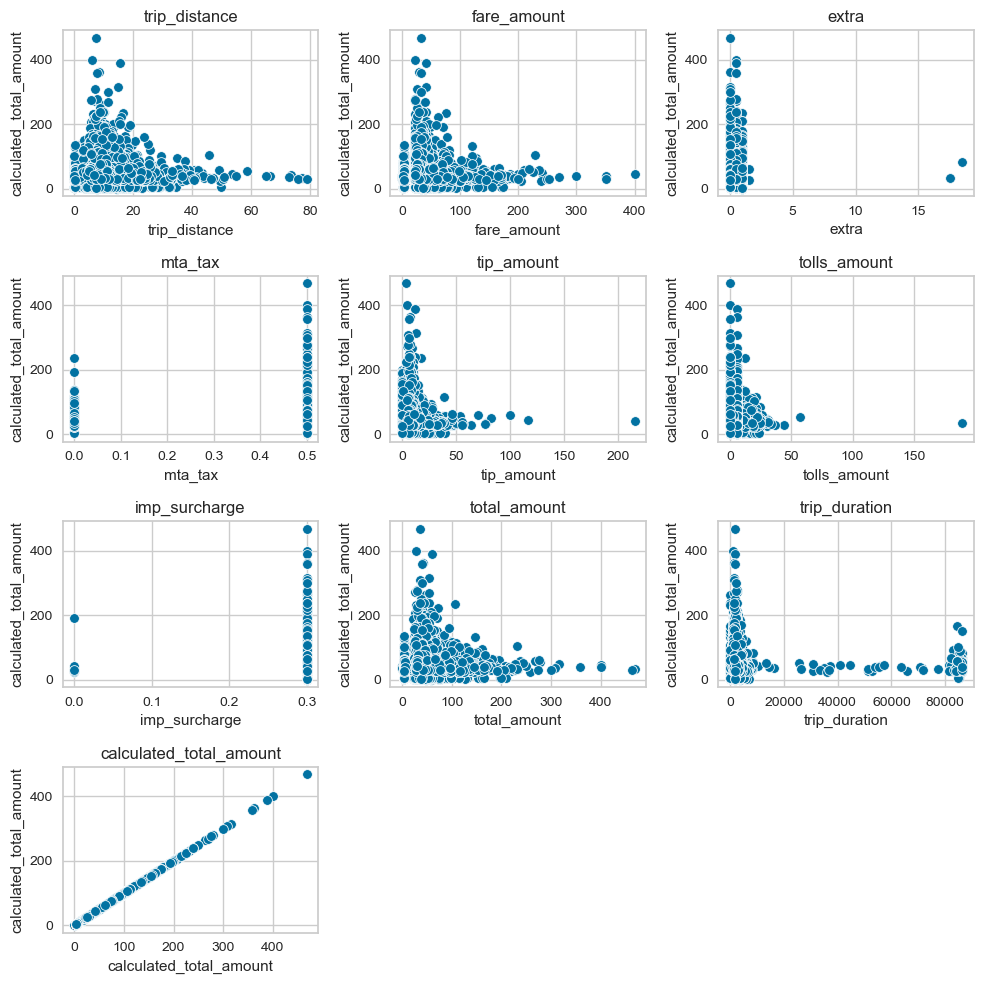

In [151]:
plt.figure(figsize=(10,10),)

nrows= 4
ncols=3
t=1

for i in num_cols:
    plt.subplot(nrows,ncols,t)
    sns.scatterplot(taxi[i],taxi.calculated_total_amount)
    plt.title(i)
    t+=1

plt.tight_layout()
plt.show()

Note:: Remove the Outliers

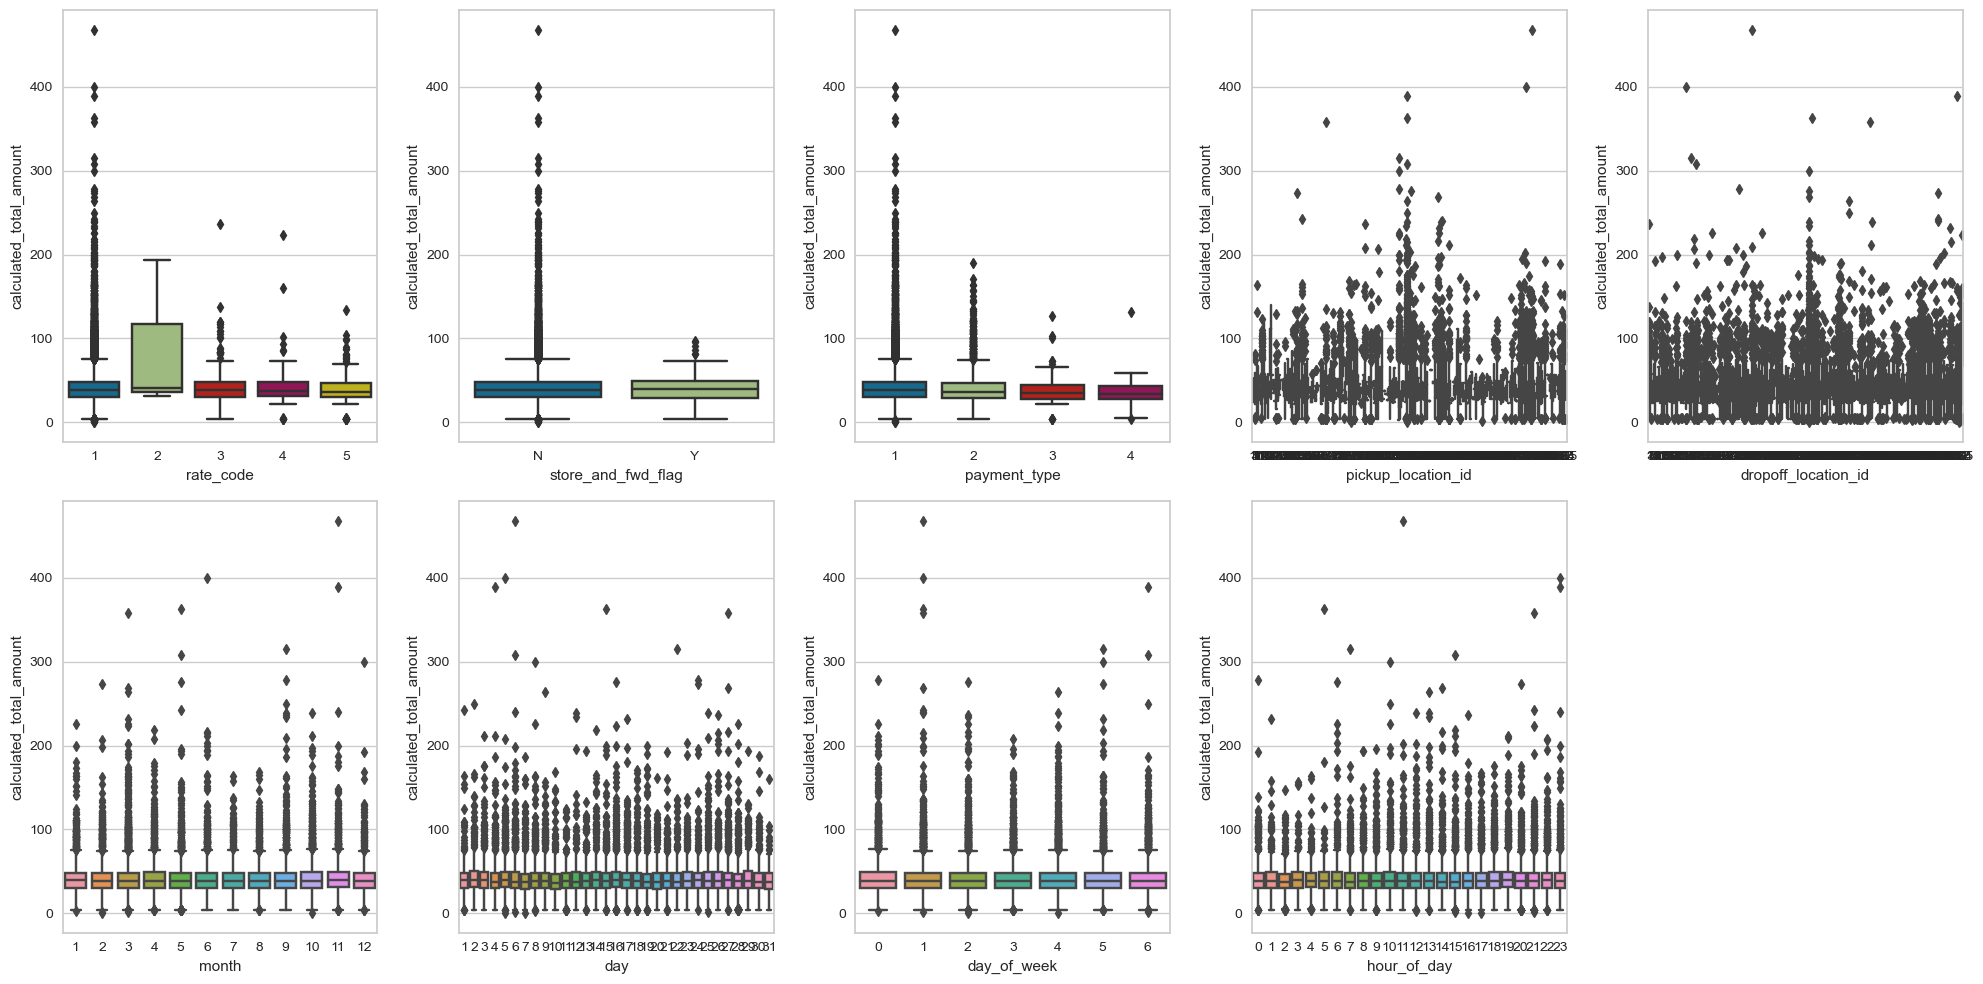

In [152]:
#Cat vs Num

plt.figure(figsize=(20,10))

nrows=2
ncols=5
t=1

for i in cat_cols:
    plt.subplot(nrows,ncols,t)
    sns.boxplot(taxi[i],taxi.calculated_total_amount)
    t+=1
    
plt.tight_layout()
plt.show()

In [153]:
#Check for the missing values if any...
taxi.isnull().sum()

trip_distance                  0
rate_code                      0
store_and_fwd_flag             0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
imp_surcharge                  0
total_amount                   0
pickup_location_id             0
dropoff_location_id            0
month                          0
day                            0
day_of_week                    0
hour_of_day                    0
trip_duration                  0
calculated_total_amount    15000
dtype: int64

In [154]:
taxi.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,3,7,2,6,2131.0,24.30
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2,25,6,10,2377.0,37.40
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,1,29,0,8,1286.0,30.36
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,9,25,1,20,2586.0,4.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,8,20,0,21,1575.0,23.80


# Feature Engineering

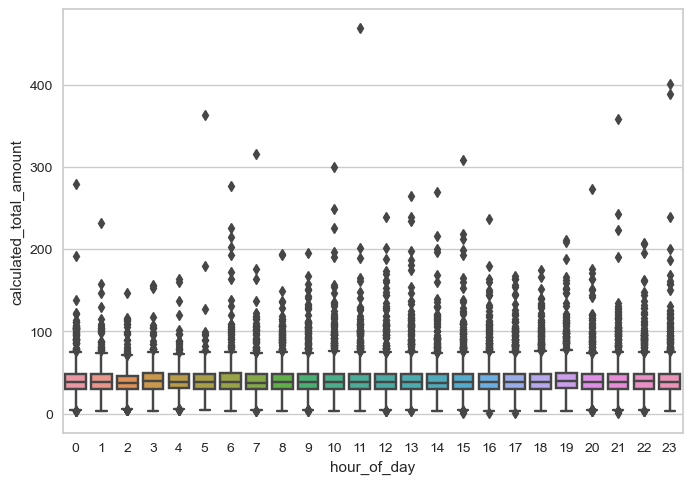

In [155]:
#Day of the week
sns.boxplot(x='hour_of_day',y='calculated_total_amount', data=taxi)
plt.show()

In [156]:
# Peak Hours       5,10,11,15,16,19,20,21,22,23
taxi['peak_hours']=taxi.hour_of_day.apply(lambda x: 1 if x in [5,10,11,15,16,19,20,21,22,23] else 0)

<AxesSubplot:xlabel='peak_hours', ylabel='calculated_total_amount'>

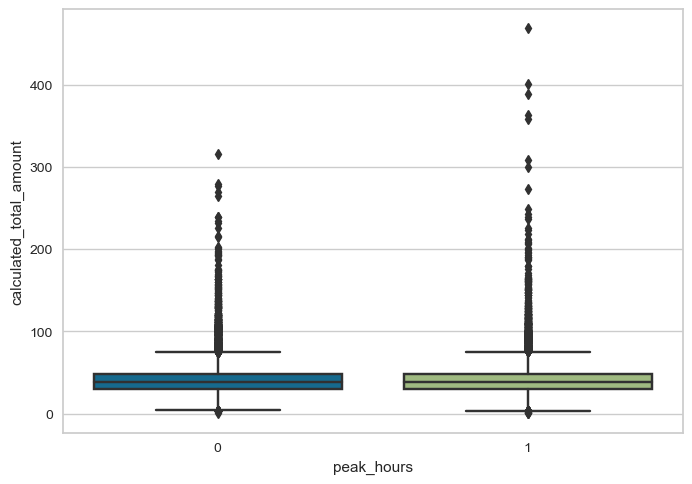

In [157]:
sns.boxplot(x='peak_hours',y='calculated_total_amount', data=taxi)

In [158]:
taxi.hour_of_day.unique()

array([ 6, 10,  8, 20, 21,  7,  2,  3, 18, 12, 16, 15, 11, 17, 19, 22, 14,
        0,  4,  5,  9, 13, 23,  1], dtype=int64)

In [159]:
wee=[1,2,3,4,5,6]
office=[7,8,9,10,11]
lunch=[12,13,14,15,16]
returning=[17,18,19,20,21,22,23,0]

hour=[]
for i in taxi.hour_of_day:
    if i in wee:
        hour.append('Wee_hours')
    elif i in office:
        hour.append('Office_hours')
    elif i in lunch:
        hour.append('Lunch_hours')
    else:
        hour.append('Returning_hours')

taxi['Time']=hour

In [160]:
from statsmodels.stats.anova import anova_lm
import statsmodels.formula.api as sfa

anova_lm(sfa.ols('calculated_total_amount~Time',data=taxi).fit())

,df,sum_sq,mean_sq,F,PR(>F)
Time,3.0,1.530328e+03,510.109251,1.388569,0.244137
Residual,34996.0,1.285625e+07,367.363297,NaN,NaN


In [161]:
taxi.drop('Time',axis=1,inplace=True)

# Clustering

In [162]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [163]:
kmeans=KMeans(random_state=42)
elbow=KElbowVisualizer(estimator=kmeans, random_state=42)

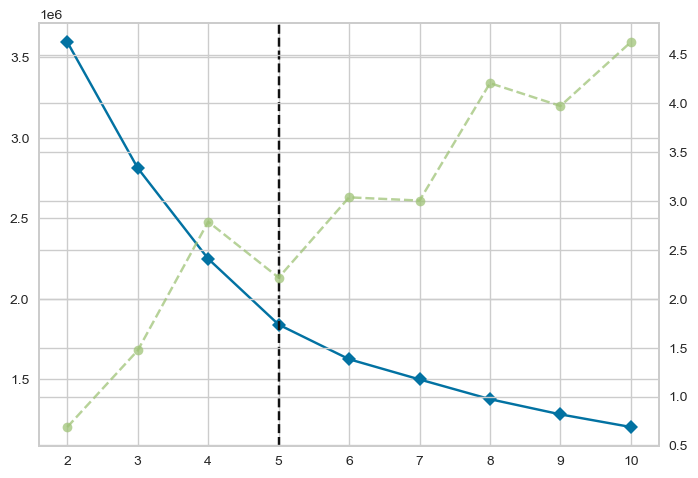

In [164]:
#Hour_of_day,day,month, dayoftheweek

data=taxi.loc[:,['month', 'day', 'day_of_week', 'hour_of_day']]

#Fit the elbow

elbow.fit(data)
plt.show()         #The no of clusters would be 5.

In [165]:
#Fitting the clusters and generating the labels
kmeans=KMeans(n_clusters=5,random_state=42)
labels=kmeans.fit(data)

taxi['cluster_labels']=labels.labels_

In [166]:
from statsmodels.stats.anova import anova_lm
import statsmodels.formula.api as sfa

anova_lm(sfa.ols('calculated_total_amount~cluster_labels',data=taxi).fit())

,df,sum_sq,mean_sq,F,PR(>F)
cluster_labels,1.0,3.537818e+02,353.781776,0.962997,0.32644
Residual,34998.0,1.285742e+07,367.375921,NaN,NaN


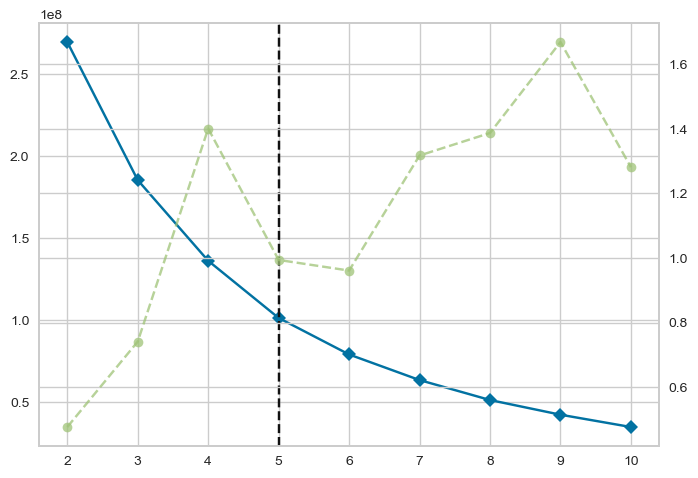

In [167]:
kmeans=KMeans(random_state=0)
elbow=KElbowVisualizer(estimator=kmeans, random_state=0)

#Hour_of_day,day,month, dayoftheweek

data=taxi.loc[:,['pickup_location_id', 'dropoff_location_id']]

#Fit the elbow

elbow.fit(data)
plt.show()         #The no of clusters would be 5.

In [168]:
#Fitting the clusters and generating the labels
kmeans=KMeans(n_clusters=5,random_state=0)
labels=kmeans.fit(data)

taxi['geo_labels']=labels.labels_

In [169]:
anova_lm(sfa.ols('calculated_total_amount~geo_labels',data=taxi).fit())

,df,sum_sq,mean_sq,F,PR(>F)
geo_labels,1.0,5.572426e+02,557.242591,1.516842,0.218106
Residual,34998.0,1.285722e+07,367.370108,NaN,NaN


<AxesSubplot:xlabel='geo_labels', ylabel='calculated_total_amount'>

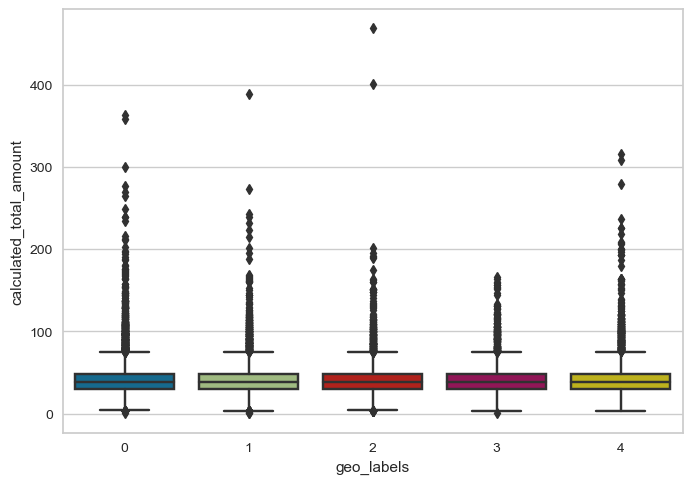

In [170]:
sns.boxplot(taxi.geo_labels,taxi.calculated_total_amount)

In [171]:
taxi.groupby('geo_labels')['calculated_total_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
geo_labels,,,,,,,,
0,10933.0,41.515504,19.676708,0.31,30.36,38.47,48.30,362.80
1,7421.0,41.427380,18.832186,0.31,30.35,38.76,48.36,389.12
2,5119.0,41.149008,19.354721,3.30,30.30,38.16,48.07,468.35
3,3692.0,40.769014,17.872254,0.90,29.80,37.80,47.85,165.80
4,7835.0,41.335817,19.225879,3.30,30.29,38.30,48.36,315.38


In [172]:
#top5 geo locations
#138~queens, 132~Queens, 230 ~ Manhattan, 161 ~Manhattan, 162 ~ Manhattan, 13~Manhattan

taxi.pickup_location_id.value_counts().head(10)        

138    12719
132     3451
230     1642
161     1510
162     1390
186     1213
48      1109
231     1011
163      998
236      985
Name: pickup_location_id, dtype: int64

In [173]:
taxi_codes=pd.read_csv('taxi.csv',delimiter=',',index_col=0)
taxi_codes.head()

,Borough,Zone
LocationID,,
1,EWR,Newark Airport
2,Queens,Jamaica Bay
3,Bronx,Allerton/Pelham Gardens
4,Manhattan,Alphabet City
5,Staten Island,Arden Heights


In [174]:
manhattan_list=taxi_codes[taxi_codes.Borough=='Manhattan'].index

In [175]:
queens_list=taxi_codes[taxi_codes.Borough=='Queens'].index

In [176]:
taxi['locations']=taxi.pickup_location_id.apply(lambda x: 'Manhattan' if x in manhattan_list else 'Queens' if x in queens_list  else 'Others')

In [177]:
taxi['dropoff_locations']=taxi.dropoff_location_id.apply(lambda x: 'Manhattan' if x in manhattan_list else 'Queens' if x in queens_list  else 'Others')

In [178]:
taxi.columns

Index(['trip_distance', 'rate_code', 'store_and_fwd_flag', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'imp_surcharge', 'total_amount', 'pickup_location_id',
       'dropoff_location_id', 'month', 'day', 'day_of_week', 'hour_of_day',
       'trip_duration', 'calculated_total_amount', 'peak_hours',
       'cluster_labels', 'geo_labels', 'locations', 'dropoff_locations'],
      dtype='object')

In [ ]:
kmeans= KMeans(random_state=2)
elbow=KElbowVisualizer(estimator=kmeans,random_state=42)

data = taxi.loc[:,['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'imp_surcharge']]

# fit the elbow
elbow.fit(data)
plt.show()

kmeans= KMeans(n_clusters=6,random_state=42)
centres=kmeans.fit(data)

taxi["fare_centres"]=centres.labels_

In [183]:
#Finding the number of trips happened
taxi['trip_count']=taxi.groupby('pickup_location_id')['dropoff_location_id'].transform('nunique')

In [184]:
taxi.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount,peak_hours,cluster_labels,geo_labels,locations,dropoff_locations,fare_centres,trip_count
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,3,7,2,6,2131.0,24.30,0,2,2,Manhattan,Queens,1,74
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2,25,6,10,2377.0,37.40,1,1,3,Manhattan,Manhattan,1,119
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,1,29,0,8,1286.0,30.36,0,1,1,Queens,Manhattan,0,218
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,9,25,1,20,2586.0,4.30,1,3,0,Manhattan,Queens,1,169
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,8,20,0,21,1575.0,23.80,1,4,4,Manhattan,Manhattan,1,152


In [ ]:
#Fare per mile, day, month
taxi['fare_per_mile']=taxi['total_amount']/taxi['trip_distance']

In [194]:
#minimum Fare per day
taxi['min_fare_pd']=taxi.groupby('day')['total_amount'].transform('min')

#maximum Fare per day
taxi['max_fare_pd']=taxi.groupby('day')['total_amount'].transform('max')

#mean Fare per day
taxi['mean_fare_pd']=taxi.groupby('day')['total_amount'].transform('mean')

#std Fare per day
taxi['std_fare_pd']=taxi.groupby('day')['total_amount'].transform('std')

#median Fare per day
taxi['med_fare_pd']=taxi.groupby('day')['total_amount'].transform('median')

In [195]:
#minimum Fare per month
taxi['min_fare_pm']=taxi.groupby('month')['total_amount'].transform('min')

#maximum Fare per month
taxi['max_fare_pm']=taxi.groupby('month')['total_amount'].transform('max')

#mean Fare per month
taxi['mean_fare_pm']=taxi.groupby('month')['total_amount'].transform('mean')

#std Fare per month
taxi['std_fare_pm']=taxi.groupby('month')['total_amount'].transform('std')

#median Fare per month
taxi['med_fare_pm']=taxi.groupby('month')['total_amount'].transform('median')

In [199]:
taxi.columns

Index(['trip_distance', 'rate_code', 'store_and_fwd_flag', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'imp_surcharge', 'total_amount', 'pickup_location_id',
       'dropoff_location_id', 'month', 'day', 'day_of_week', 'hour_of_day',
       'trip_duration', 'calculated_total_amount', 'peak_hours',
       'cluster_labels', 'geo_labels', 'locations', 'dropoff_locations',
       'fare_centres', 'trip_count', 'min_fare_pd', 'max_fare_pd',
       'mean_fare_pd', 'std_fare_pd', 'med_fare_pd', 'min_fare_pm',
       'max_fare_pm', 'mean_fare_pm', 'std_fare_pm', 'med_fare_pm'],
      dtype='object')

In [201]:
#Drop the columns
newdata = taxi.drop(['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount','imp_surcharge','pickup_location_id',
               'dropoff_location_id', 'month', 'day', 'day_of_week','hour_of_day'],axis=1)

In [202]:
#Factorize the store and fwd flag
newdata['store_and_fwd_flag']=pd.factorize(newdata.store_and_fwd_flag)[0]

In [203]:
#Split the Data in train and test
newtrain=newdata.loc[:train.shape[0]-1,]
newtest=newdata.loc[train.shape[0]:,]

In [204]:
newtrain.shape,newtest.shape

((35000, 24), (15000, 24))

In [205]:
newtest.drop('calculated_total_amount',axis=1,inplace=True)

In [214]:
#Outliers 

q1= newtrain.quantile(0.25)
q3= newtrain.quantile(0.75)

iqr=q3-q1

lower_lim=q1-1.5*iqr
upper_lim=q3+1.5*iqr

In [215]:
#Eliminate the outliers
wt_outliers=newtrain.loc[~((newtrain<lower_lim)|(newtrain>upper_lim)).any(axis=1),]

In [216]:
wt_outliers.shape,newtest.shape

((20666, 24), (15000, 23))

In [217]:
#Split the Datain X and y
X=wt_outliers.drop('calculated_total_amount',axis=1)
y=wt_outliers.calculated_total_amount

In [219]:
X=pd.get_dummies(X,drop_first=True)
newtest=pd.get_dummies(newtest,drop_first=True)

In [220]:
#Modelling

In [223]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score, KFold

In [229]:
#Define the base models

def base_models():
    models=dict()
    models['lg']=LinearRegression()
    models['dt']=DecisionTreeRegressor()
    models['rf']=RandomForestRegressor()
    models['gbm']=GradientBoostingRegressor()
    models['xgb']=XGBRegressor()
    models['lgbm']=LGBMRegressor()
    models['catboost']=CatBoostRegressor()
    return models


In [231]:
#Evaluation Function.....

def eval_score(model):
    cv1=KFold(n_splits=5,shuffle=True,random_state=42)
    score=-cross_val_score(model,X,y,
                         scoring='neg_root_mean_squared_error',cv=cv1,
                         error_score='raise', n_jobs=-1)
    return score

In [232]:
#Build the models....
models=base_models()


result, names =list(), list()
for name, model in models.items():
    finalscore=eval_score(model)
    result.append(finalscore)
    names.append(name)
    print('%s %.3f (%.3f)'%(name,np.mean(result),np.std(result)))

lg 12.349 (0.147)
dt 15.114 (2.770)
rf 14.269 (2.560)
gbm 13.791 (2.368)
xgb 13.603 (2.152)
lgbm 13.405 (2.015)
catboost 13.279 (1.892)


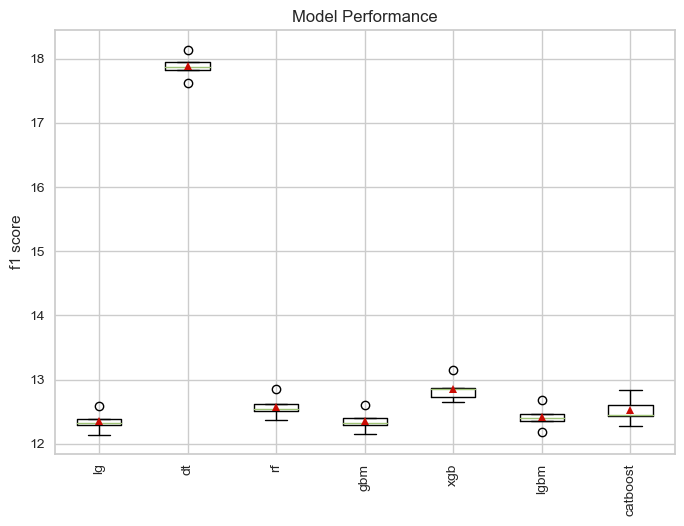

In [233]:
plt.boxplot(result,labels=names,showmeans=True)
plt.xticks(rotation=90)
plt.ylabel('f1 score')
plt.title('Model Performance')
plt.show()

In [234]:
#Lets start with xgboost

lr=LinearRegression()

kfold=KFold(n_splits=5,shuffle=True,random_state=42)

pred_lr=[]
for train_index, test_index in kfold.split(X,y):
    xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred_lr.append(lr.fit(xtrain,ytrain).predict(newtest))
    
pred=pd.DataFrame(pred_lr).T.mean(axis=1)

In [236]:
submission['calculated_total_amount']=pred
submission.to_csv('LRModel.csv',index=False)

In [237]:
#Lets start with xgboost

lgbm=LGBMRegressor()

kfold=KFold(n_splits=5,shuffle=True,random_state=42)

pred_lgbm=[]
for train_index, test_index in kfold.split(X,y):
    xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred_lgbm.append(lgbm.fit(xtrain,ytrain).predict(newtest))
    
pred=pd.DataFrame(pred_lgbm).T.mean(axis=1)

In [238]:
submission['calculated_total_amount']=pred
submission.to_csv('LGBMModel.csv',index=False)